In [2]:
%load_ext autoreload
%autoreload 2

import os

import numpy as np
import pandas as pd
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import clamp_experiment_analysis as ea

In [29]:
runs = ea.get_all_expe()
runs

['1642409975#EXPE1', '1642267764#EXPE1']

In [253]:
run = '1642267764#EXPE1' # test
run = '1642409975#EXPE1' # boston
df = ea.get_expe_results(run)
df


   dataset   pool  k_init  k_refinement  max_epochs  n_sampling  \
0   boston  Basic       1             0           1         100   
1   boston  Basic       1             0           2         100   
2   boston  Basic       1             0           3         100   
3   boston  Basic       1             0           4         100   
4   boston  Basic       1             0           5         100   
5   boston  Basic       1             0           6         100   
6   boston  Basic       1             0           7         100   
7   boston  Basic       1             0           8         100   
8   boston  Basic       1             0           9         100   
9   boston  Basic      10             0           1         100   
10  boston  Basic      10             0           2         100   
11  boston  Basic      10             0           3         100   
12  boston  Basic      10             0           4         100   
13  boston  Basic      10             0           5         10

Couldn't open results for D$boston_P$Basic_KI$100_KR$0_ME$8
Couldn't open results for D$boston_P$Basic_KI$100_KR$0_ME$9


,dataset,pool,k_init,k_refinement,max_epochs,n_sampling,precision_all,precision_without_disctrain,n_generated,n_replication
0,boston,Basic,1,0,1,100,"[0.06, 0.17, 0.33, 0.77, 0.18, 0.32, 0.3, 0.19...","[0.03, 0.26, 0.24, 0.3, 0.3, 0.28, 0.32, 0.11,...",16.0,0
1,boston,Basic,1,0,2,100,"[0.33, 0.75, 0.14, 0.31, 0.15, 0.07, 0.6, 0.31...","[0.21, 0.23, 0.4, 0.11, 0.21, 0.21, 0.44, 0.38...",138.0,0
2,boston,Basic,1,0,3,100,"[0.27, 0.81, 0.62, 0.36, 0.72, 0.16, 0.45, 0.2...","[0.36, 0.24, 0.33, 0.16, 0.18, 0.29, 0.34, 0.6...",405.0,0
3,boston,Basic,1,0,4,100,"[0.55, 0.76, 0.53, 0.59, 0.66, 0.26, 0.62, 0.5...","[0.55, 0.66, 0.26, 0.62, 0.59, 0.72, 1.0, 0.38...",792.0,0
4,boston,Basic,1,0,5,100,"[0.58, 0.88, 0.77, 0.95, 0.65, 0.94, 0.57, 0.7...","[0.58, 0.77, 0.95, 0.65, 0.94, 0.57, 0.73, 1.0...",1359.0,0
...,...,...,...,...,...,...,...,...,...,...
103,boston,Basic,100,0,5,100,"[0.95, 0.92, 0.72, 0.86, 0.3, 0.72, 0.84, 0.94...","[0.95, 0.92, 0.72, 0.86, 0.3, 0.72, 0.84, 0.94...",167624.0,2
104,boston,Basic,100,0,6,100,"[1.0, 0.91, 0.85, 0.76, 0.94, 0.67, 0.95, 0.93...","[1.0, 0.91, 0.85, 0.76, 0.94, 0.67, 0.95, 0.93...",286424.0,2
105,boston,Basic,100,0,7,100,"[0.99, 0.95, 0.89, 0.75, 0.8, 0.98, 0.89, 0.97...","[0.99, 0.95, 0.89, 0.75, 0.8, 0.98, 0.89, 0.97...",503085.0,2
106,boston,Basic,100,0,8,100,NaN,NaN,NaN,2


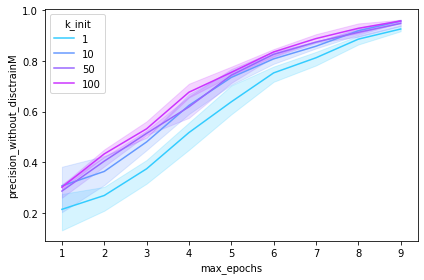

In [254]:
dfas = df.copy()
#dfas = df[df.pool=="AutoGluon"]
#dfas = dfas[dfas.n_replication==0]
#dfas = dfas[dfas.k_init==20]

#dfas = dfas[dfas.competitor.isin(['P2G-xgb', 'RandomSampling-xgb'])]
#dfas.shape

for d in df.dataset.unique():

    tmp = dfas[dfas.dataset==d]
    tmp["precision_allM"] = df.precision_all.map(np.mean)
    tmp["precision_allP"] = df.precision_all.map(lambda x:(np.array(x>=0.90)).mean())
    tmp["precision_without_disctrainM"] = df.precision_without_disctrain.map(np.mean)
    tmp["precision_without_disctrainP"] = df.precision_without_disctrain.map(lambda x:(np.array(x>=0.9)).mean())
    
    #tmp = tmp.groupby(['pool','dataset','k_init','k_refinement','max_epochs','n_sampling']).mean()
    #tmp = tmp.reset_index()
    tmp['k_init'] = tmp.k_init.astype('str')
    
    plt.figure()
    ax = sns.lineplot(x="max_epochs", y="precision_without_disctrainM", data=tmp, hue='k_init', palette="cool")
    #sns.scatterplot(x="max_epochs", y="average score", data=tmp)
    #ax.set_ylim((0.0, 1.0))
    #ax.set_title(d)
    
    plt.tight_layout()
    #plt.savefig('../../results/clamps_breastcancer.pdf')

### Nouvelle expé: P2G avec random pour évaluer heuristique du milieu.

In [198]:
df2

,dataset,pool,k_init,k_refinement,max_epochs,n_sampling,precision_all,precision_without_disctrain,n_generated,n_replication,log_efficiency
0,boston,Basic,1,0,1,100,"[0.06, 0.17, 0.33, 0.77, 0.18, 0.32, 0.3, 0.19...","[0.03, 0.26, 0.24, 0.3, 0.3, 0.28, 0.32, 0.11,...",16.0,0,2.772589
1,boston,Basic,1,0,2,100,"[0.33, 0.75, 0.14, 0.31, 0.15, 0.07, 0.6, 0.31...","[0.21, 0.23, 0.4, 0.11, 0.21, 0.21, 0.44, 0.38...",138.0,0,4.927254
2,boston,Basic,1,0,3,100,"[0.27, 0.81, 0.62, 0.36, 0.72, 0.16, 0.45, 0.2...","[0.36, 0.24, 0.33, 0.16, 0.18, 0.29, 0.34, 0.6...",405.0,0,6.003887
3,boston,Basic,1,0,4,100,"[0.55, 0.76, 0.53, 0.59, 0.66, 0.26, 0.62, 0.5...","[0.55, 0.66, 0.26, 0.62, 0.59, 0.72, 1.0, 0.38...",792.0,0,6.674561
4,boston,Basic,1,0,5,100,"[0.58, 0.88, 0.77, 0.95, 0.65, 0.94, 0.57, 0.7...","[0.58, 0.77, 0.95, 0.65, 0.94, 0.57, 0.73, 1.0...",1359.0,0,7.214504
...,...,...,...,...,...,...,...,...,...,...,...
67,boston,Basic,100,0,5,100,"[0.95, 0.9, 0.77, 0.66, 0.85, 0.81, 0.89, 0.65...","[0.95, 0.9, 0.77, 0.66, 0.85, 0.81, 0.89, 0.65...",173790.0,1,12.065603
68,boston,Basic,100,0,6,100,"[0.96, 0.94, 0.86, 0.62, 0.82, 0.96, 0.8, 0.97...","[0.96, 0.94, 0.86, 0.62, 0.82, 0.96, 0.8, 0.97...",298651.0,1,12.607031
69,boston,Basic,100,0,7,100,"[0.99, 0.98, 0.95, 0.79, 0.96, 0.73, 0.96, 0.8...","[0.99, 0.98, 0.95, 0.79, 0.96, 0.73, 0.96, 0.8...",528320.0,1,13.177457
70,boston,Basic,100,0,8,100,"[1.0, 1.0, 1.0, 0.7, 0.93, 0.78, 0.96, 0.95, 0...","[1.0, 1.0, 1.0, 0.7, 0.93, 0.78, 0.96, 0.95, 0...",966503.0,1,13.781440


<AxesSubplot:ylabel='Probability'>

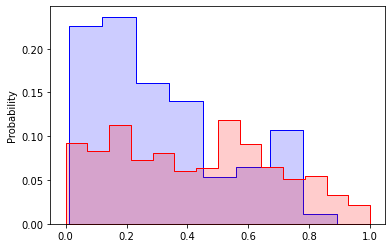

In [250]:
E1 = 2
E2 = 4

d1 = df2[(df2.n_replication == 1) & (df2.k_init == 1) & (df2.max_epochs == E1)].precision_without_disctrain
d2 = df2[(df2.n_replication == 1) & (df2.k_init == 1) & (df2.max_epochs == E2)].precision_without_disctrain
d3 = df2[(df2.n_replication == 1) & (df2.k_init == 10) & (df2.max_epochs == E1)].precision_without_disctrain
d4 = df2[(df2.n_replication == 1) & (df2.k_init == 10) & (df2.max_epochs == E2)].precision_without_disctrain
d5 = df2[(df2.n_replication == 1) & (df2.k_init == 50) & (df2.max_epochs == E1)].precision_without_disctrain
d6 = df2[(df2.n_replication == 1) & (df2.k_init == 50) & (df2.max_epochs == E2)].precision_without_disctrain

STAT="probability"

sns.histplot(d1.iloc[0], stat=STAT, element="step", color="blue", alpha=0.2)
#sns.histplot(d2.iloc[0], stat=STAT, element="step", color="cyan", alpha=0.2)
sns.histplot(d3.iloc[0], stat=STAT, element="step", color="red", alpha=0.2)
#sns.histplot(d4.iloc[0], stat=STAT, element="step", color="pink", alpha=0.2)
#sns.histplot(d5.iloc[0], stat=STAT, element="step", color="green", alpha=0.2)
#sns.histplot(d6.iloc[0], stat=STAT, element="step", color="lime", alpha=0.2)



In [240]:
d1.iloc[0].mean(), d2.iloc[0].mean(), d3.iloc[0].mean(), d4.iloc[0].mean(), d5.iloc[0].mean(), d6.iloc[0].mean(), 

(0.30290322580645157,
 0.40927659574468084,
 0.4249706457925636,
 0.4975455417066156,
 0.420576121598431,
 0.525756195658603)

1
10
50
100


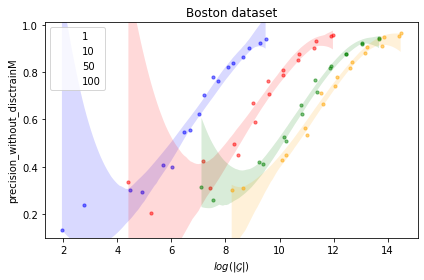

In [248]:

colors = ['blue', 'red', 'green', 'orange', 'purple', 'cyan', 'brown']

df2 = df.copy()[(df.n_generated>-1)  & (df.k_init.isin([1, 10, 50, 100, 500]))]#, 50, 100, 200, 500]))]
df2["log_efficiency"] =  df2.n_generated.astype(float).apply(np.log)

i = 0
for k in df2.k_init.unique():
    df2temp = df2[df2.k_init == k]
    df2temp["precision_allM"] = df2temp.precision_all.map(np.mean)
    df2temp["precision_allP"] = df2temp.precision_all.map(lambda x:(np.array(x>=0.90)).mean())
    df2temp["precision_without_disctrainM"] = df2temp.precision_without_disctrain.map(np.mean)
    df2temp["precision_without_disctrainP"] = df2temp.precision_without_disctrain.map(lambda x:(np.array(x>=0.9)).mean())
    
    sns.regplot(data=df2temp , x="log_efficiency", y="precision_without_disctrainM", color=colors[i], order=3, ci=95,
                scatter_kws={"s":10, "alpha":0.5}, line_kws={"linewidth":0})#, hue="max_epochs", style='k_init', palette="flare", s=100)
    print(k)
    i += 1
plt.xlabel('$log(|\mathcal{G}|)$')
plt.legend(labels=df2.k_init.unique())
plt.title('Boston dataset')
plt.ylim(0.1, 1.01)

plt.tight_layout()

In [71]:
tmp

,pool,dataset,k_init,k_refinement,max_epochs,n_sampling,precision_all,precision_without_disctrain,n_replication
0,Basic,boston,1,0,1,100,0.071438,0.000000,0.5
1,Basic,boston,1,0,2,100,0.079001,0.004348,0.5
2,Basic,boston,1,0,3,100,0.097555,0.014295,0.5
3,Basic,boston,1,0,4,100,0.136410,0.054255,0.5
4,Basic,boston,1,0,5,100,0.206225,0.127367,0.5
5,Basic,boston,1,0,6,100,0.309160,0.244125,0.5
6,Basic,boston,1,0,7,100,0.326899,0.268892,0.5
7,Basic,boston,1,0,8,100,0.600180,0.566247,0.5
8,Basic,boston,1,0,9,100,0.750681,0.730210,0.5
9,Basic,boston,10,0,1,100,0.040887,0.000000,0.5


In [55]:
dfas = df.copy()
#dfas = df[df.pool=="AutoGluon"]
dfas = dfas[dfas.n_replication!=3]
#dfas = dfas[dfas.k_init==20]

#dfas = dfas[dfas.competitor.isin(['P2G-xgb', 'RandomSampling-xgb'])]
#dfas.shape

for d in df.dataset.unique():

    tmp = dfas[dfas.dataset==d]
    
    tmp = tmp.groupby(['pool','dataset','k_init','k_refinement','max_epochs','n_sampling','competitor']).agg(['mean', 'std'])
tmp    
    
   

KeyError: 'competitor'

In [ ]:
dfas = df[df.pool=="AutoSklearn"]
#dfas = dfas[dfas.max_epochs>3]
#dfas = dfas[dfas.k_refinement==0]
dfas = dfas[dfas.competitor.isin(['P2G-xgb', 'RandomSampling-xgb'])]
dfas.shape

for d in df.dataset.unique():

    tmp = dfas[dfas.dataset==d]

    tmp = tmp.groupby(['pool','dataset','k_init','k_refinement','max_epochs','n_sampling','n_replication','competitor']).mean()
    tmp = tmp.reset_index()
    
    plt.figure()
    ax = sns.lineplot(x="max_epochs", y="f1-score", hue="competitor", data=tmp)
    ax.set_title(d)

In [ ]:
dfas = df[df.pool=="AutoSklearn"]
#dfas = dfas[dfas.max_epochs>3]
#dfas = dfas[dfas.k_refinement==0]
dfas = dfas[dfas.competitor.isin(['P2G-xgb', 'RandomSampling-xgb'])]
dfas.shape

for d in df.dataset.unique():

    tmp = dfas[dfas.dataset==d]

    tmp = tmp.groupby(['pool','dataset','k_init','k_refinement','max_epochs','n_sampling','n_replication','competitor']).mean()
    tmp = tmp.reset_index()
    
    plt.figure()
    ax = sns.lineplot(x="k_refinement", y="f1-score", hue="competitor", data=tmp)
    ax.set_title(d)

# On essaie de regarder comment évoluent les longueurs des intervalles

In [ ]:
%%time 
from sklearn.metrics import pairwise_distances


K_INIT = [100]
EPOCHS = [2, 5]

#out = {} # décommenté si updater simplement dico

for k in K_INIT:
    print('====K', k)
    for epoch in EPOCHS:
        print('====EP', epoch)
        p2g = pool2graph.pool2graph(X_train, y_train, pool1, k_init=k)

        p2g.fit(max_epochs=epoch)
        intervals = discrepancies_intervals.get_discrepancies_intervals(p2g.G)
        
        out[str(k)+"_"+str(epoch)] = []
        
        for ii in intervals:
            a, b = ii.border_features.iloc[0, :].values.reshape(1, -1), ii.border_features.iloc[1, :].values.reshape(1, -1)
            out[str(k)+"_"+str(epoch)].append(pairwise_distances(a, b)[0][0])


In [ ]:
BW = 0.2
ALPHA = 0.5
STAT = "probability" #"density"

sns.set_context('paper')

sns.histplot(out["1_2"], stat="probability", color="blue", kde=False, element="step", alpha=ALPHA, binwidth=BW)
sns.histplot(out["1_5"], stat="probability", color="cyan", kde=False, alpha=ALPHA, binwidth=BW, element="step")
#sns.distplot(out["1_9"])
sns.histplot(out["10_2"], stat="probability", color="red", kde=False, element="step", alpha=ALPHA, binwidth=BW)
sns.histplot(out["10_5"], stat="probability", color="pink", kde=False, element="step", alpha=ALPHA, binwidth=BW)
#sns.distplot(out["100_2"])
#sns.distplot(out["100_2"])

plt.legend(labels=["$k=1, n_{epochs}=2$", "$k=1, n_{epochs}=5$", 
                   "$k=10, n_{epochs}=2$", "$k=10, n_{epochs}=5$"], loc='center left', bbox_to_anchor=(1, 0.5))

## On compare à la main (pour l'instant) avec random